**DEB**

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from Data_challenge_fairness_2024.evaluator import *
from evaluator import *

In [18]:
#####################################################
# Load pickle file and convert to numpy array
#####################################################

with open('data-challenge-student.pickle', 'rb') as handle:
    # dat = pickle.load(handle)
    dat = pd.read_pickle(handle)
 
#Check keys()
print(dat.keys())
X = dat['X_train']
Y = dat['Y']
S = dat['S_train']

X_test_true = dat['X_test']
S_test_true = dat['S_test']

Y56= Y + 28*S
#X, X_test,Y,S, S_test = dat[1]

print(X.shape,Y.shape,S.shape,X_test_true.shape,S_test_true.shape)

dict_keys(['X_train', 'X_test', 'Y', 'S_train', 'S_test'])
(27749, 768) (27749,) (27749,) (11893, 768) (11893,)


In [15]:
###############################################
# ORTHOGONAL PROJECTION
###############################################

# COMPARISON OF AVERAGE EMBEDDING

X_sensitive = X[S==1]
X_non_sensitive = X[S!=1]
print(len(X_sensitive),len(X_non_sensitive),len(X)-len(X_sensitive)-len(X_non_sensitive))
X_sensitive_mean=X_sensitive.mean()
X_non_sensitive_mean=X_non_sensitive.mean()
diff_mean = X_sensitive_mean-X_non_sensitive_mean
diff_mean

X_debiased = X.copy()
X_debiased [S==1] -= diff_mean
X_debiaised_sensitive_mean = (X_debiased [S==1]).mean()

# function to debiase data
def remove_info(dataset, diff):
    # Compute the dot product of each row of the dataset with diff
    dot_products = np.dot(dataset, diff)
    
    # Compute the magnitude of diff
    diff_magnitude_squared = np.dot(diff, diff)
    
    # Compute the projection of each row onto diff
    projection = np.outer(dot_products / diff_magnitude_squared, diff)
    
    # Subtract the projection from the dataset
    modified_dataset = dataset - projection
    
    return modified_dataset

# Assuming dataset is your (n, 768) array and diff is your (768,) vector
# Call the function
modified_X = remove_info(X, diff_mean)

# training logistic model
clf_1 = LogisticRegression(random_state=0, max_iter=5000,verbose=1).fit(modified_X, Y)

# predicting and assessing
Y_pred = clf_1.predict(X)
accuracy= accuracy_score(Y, Y_pred)  # Y_test are your original test labels
print(f"Accuracy on transformed test data: {accuracy}")
eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred, Y, S, metrics=['TPR'])
final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2

#print results
print('final score',final_score)
print('macro_fscore',eval_scores['macro_fscore'])
print('1-eval_scores[\'TPR_GAP\']',1-eval_scores['TPR_GAP'])

#---------------------------------------------------------------
#------------------------------------------------------------------
# (Re)Load the "true" test data
X_test_true = dat['X_test']
S_test_true = dat['S_test'] 

# Classify the provided test data with you classifier
y_test_true_1 = clf_1.predict(X_test_true)
results_1=pd.DataFrame(y_test_true_1, columns= ['score'])

results_1.to_csv("Data_Challenge_MDI_341_orthogonal.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')


12793 14956 0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        21532     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.24653D+04    |proj g|=  4.11537D+04


 This problem is unconstrained.



At iterate   50    f=  2.08017D+04    |proj g|=  8.31379D+02

At iterate  100    f=  1.66932D+04    |proj g|=  7.85830D+02

At iterate  150    f=  1.46755D+04    |proj g|=  2.06431D+02

At iterate  200    f=  1.36469D+04    |proj g|=  2.05513D+02

At iterate  250    f=  1.30241D+04    |proj g|=  1.05910D+02

At iterate  300    f=  1.27073D+04    |proj g|=  1.54810D+02

At iterate  350    f=  1.25281D+04    |proj g|=  1.81053D+02

At iterate  400    f=  1.24238D+04    |proj g|=  1.16570D+02

At iterate  450    f=  1.23662D+04    |proj g|=  3.06709D+01

At iterate  500    f=  1.23277D+04    |proj g|=  3.61356D+01

At iterate  550    f=  1.23087D+04    |proj g|=  1.82741D+01

At iterate  600    f=  1.22962D+04    |proj g|=  1.78591D+01

At iterate  650    f=  1.22887D+04    |proj g|=  1.24464D+01

At iterate  700    f=  1.22836D+04    |proj g|=  1.48859D+01

At iterate  750    f=  1.22808D+04    |proj g|=  6.31955D+00

At iterate  800    f=  1.22791D+04    |proj g|=  4.66916D+00

At iter

In [6]:
#print(X_sensitive_mean[:10])
#print(X_debiaised_sensitive_mean[:10])
#print(X_non_sensitive_mean[:10])

# Create DataFrame
compare = pd.DataFrame({'X_sensitive': X_sensitive_mean, 'Difference S/non S': diff_mean, 'X_debiaised': X_debiaised_sensitive_mean,'X_non_sensitive':X_non_sensitive_mean})
compare

import numpy as np

In [19]:
#####################################################
#   SCORE A BLANC
#####################################################


n=Y.shape[0]
Y_pred =np.ones(n)*1
accuracy= accuracy_score(Y, Y_pred)  # Y_test are your original test labels
print(f"Accuracy on transformed test data: {accuracy}")
eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred, Y, S, metrics=['TPR'])
final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2

#print results
print('final score',final_score)
print('macro_fscore',eval_scores['macro_fscore'])
print('1-eval_scores[\'TPR_GAP\']',1-eval_scores['TPR_GAP'])

Accuracy on transformed test data: 0.025334246279145194
final score 0.500882289771938
macro_fscore 0.0017648771866401558
1-eval_scores['TPR_GAP'] 0.999999702357236


In [28]:
# test score "prediction uniforme"

n=Y.shape[0]

Scores_U=pd.DataFrame(columns=['N','N_f','N_h','accuracy','final_score','macro_f1','macro_gap'])

print(Scores_U)
for i in range(28):
    #Test value for all i values
    test=pd.DataFrame(np.ones(11893,dtype=int)*i)
    test.to_csv("all/Data_Challenge_all_"+str(i)+".csv", header = None, index = None)
    
    Y_pred=pd.DataFrame(np.ones(n,dtype=int)*i)
    accuracy= accuracy_score(Y, Y_pred)  # Y_test are your original test labels
    eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred, Y, S, metrics=['TPR'])
    macro_f1 = eval_scores['macro_fscore']
    macro_gap = eval_scores['TPR_GAP']
    final_score = (macro_f1 +1- macro_gap)/2
    # check number of occurence
    N = (Y==i).sum()
    N_f = (Y56 == i + 28).sum()
    N_h = (Y56 == i).sum()
    Scores_U.loc[i]= [N, N_f, N_h, accuracy,final_score,macro_f1,macro_gap]

Scores_U

Empty DataFrame
Columns: [N, N_f, N_h, accuracy, final_score, macro_f1, macro_gap]
Index: []


,N,N_f,N_h,accuracy,final_score,macro_f1,macro_gap
0,387.0,150.0,237.0,0.013946,0.500491,0.000982,2.976428e-07
1,703.0,163.0,540.0,0.025334,0.500882,0.001765,2.976428e-07
2,2273.0,891.0,1382.0,0.081913,0.502704,0.005408,2.976428e-07
3,184.0,56.0,128.0,0.006631,0.500235,0.000471,2.976428e-07
4,206.0,46.0,160.0,0.007424,0.500263,0.000526,2.976428e-07
5,386.0,62.0,324.0,0.013910,0.500490,0.000980,2.976428e-07
6,994.0,342.0,652.0,0.035821,0.501235,0.002470,2.976428e-07
7,262.0,240.0,22.0,0.009442,0.500334,0.000668,2.976428e-07
8,107.0,15.0,92.0,0.003856,0.500137,0.000274,2.976428e-07
9,499.0,152.0,347.0,0.017983,0.500631,0.001262,2.976428e-07


<function matplotlib.pyplot.show(close=None, block=None)>

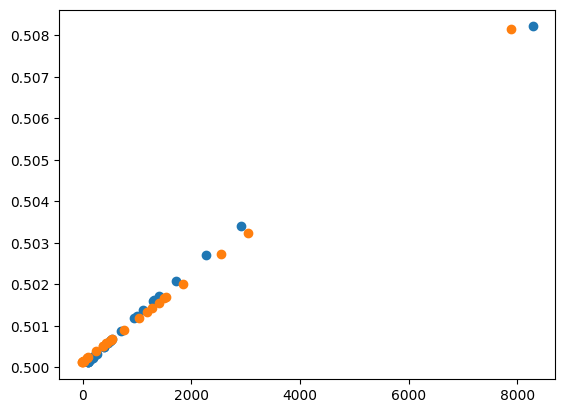

In [53]:
size = Scores_U['N']
score = Scores_U['final_score']


# Créer et entraîner le modèle de régression linéaire
from sklearn.linear_model import LinearRegression
reverse = LinearRegression()
reverse.fit(np.array(score).reshape(-1, 1),np.array(size).reshape(-1, 1))

# Load the scores for X_true
scores_true = pd. read_csv('all/distribution_Y_true.txt',header = None,index_col=0)
dist_true_pred = reverse.predict(scores_true) #/ 11893 * 27749

# Afficher la distribution de X_test_true
plt.scatter(size,score)
plt.scatter(dist_true_pred,scores_true)
plt.show

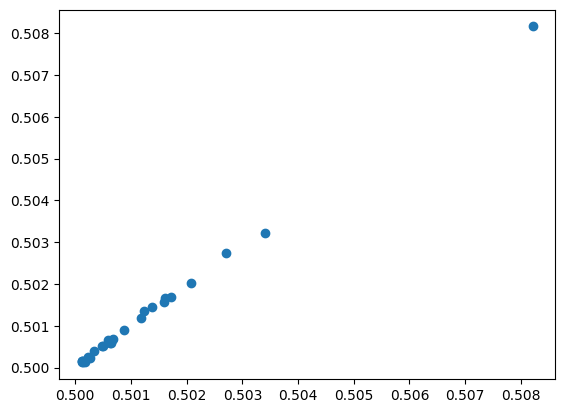

In [55]:
plt.scatter(Scores_U['final_score'],scores_true)

ValueError: 'X_test_true' is not a valid format string (two marker symbols)

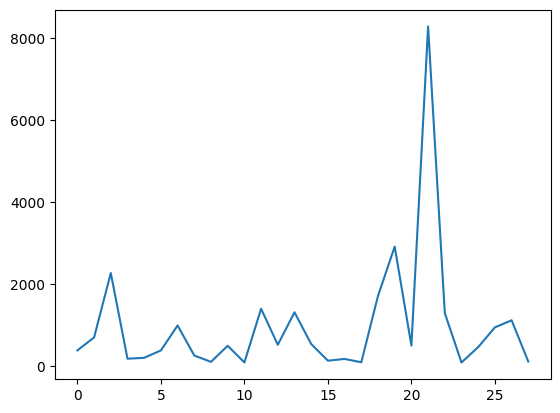

In [56]:
plt.plot(range(28),size,label='X')
plt.plot(range(28),np.round(dist_true_pred),'X_test_true')
plt.legend()

In [9]:
# Normalize data (L2 norm recommended for embeddings)
#X = normalize(X, norm='l2')
#X_test_true = normalize(X_test_true, norm='l2')

# Split the data (final _ to keep split data untouched and be able to reload in file)
X_train_, X_test_, Y_train_, Y_test_, S_train_, S_test_ = train_test_split(X, Y, S, test_size=0.3, random_state=42)

# Refresh training data
X_train, X_test, Y_train, Y_test, S_train, S_test = X_train_, X_test_, Y_train_, Y_test_, S_train_, S_test_

In [3]:
##############################################################
# train_test_split with Y56 (np.arrays)
##############################################################

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y56_train, Y56_test = train_test_split(X, Y56, test_size=0.2, random_state=42)
Y_train = Y56_train % 28  # reste (original Y)   ex 33% 28 = classe 5 
S_train = Y56_train//28   # facteur (original S) ex 33//28 = 1 (attribut protégé)
Y_test = Y56_test % 28  # reste (original Y)   ex 33% 28 = classe 5 
S_test = Y56_test//28   # facteur (original S) ex 33//28 = 1 (attribut protégé)

# impression des dimensions
print('train:',X_train.shape,Y_train.shape,S_train.shape)
print('test:',X_test.shape,Y_test.shape, S_test.shape)

train: (22199, 768) (22199,) (22199,)
test: (5550, 768) (5550,) (5550,)


**Explore data**
---

In [5]:
dist = pd.DataFrame({'label':Y,'S':S})

# Sum counts of 1s and 0s to get the total count for each label
result = dist.groupby('label')['S'].value_counts().unstack(fill_value=0)
result.columns = ['S', 'not_S']
result['total_count'] = result.sum(axis=1)

# Calculate totals for each column
totals = result.sum(axis=0)
result.loc[30] = totals

# Calculate total count percentages for each count
result['%_S_label'] = round((result['S'] / result['total_count']) * 100)
result['%_not_S_label'] = round((result['not_S'] / result['total_count']) * 100)
result['%_total'] = np.round(result['total_count']/len(Y)*100,2 ) # % of total count
result['%_S_total'] = np.round(result['S']/(S==1).sum()*100,2 ) # % of total count
result['%_not_S_total'] = np.round(result['not_S']/(S!=1).sum()*100,2 ) # % of total count
result['diff_%_S_total']=result['%_S_total']-result['%_total']
result['|']='|'
#Reorder table
result = result.reindex(columns=['total_count', '%_total','|','S','%_S_total','diff_%_S_total','|','not_S', '%_not_S_total','|','%_S_label', '%_not_S_label'])


result

,total_count,%_total,|,S,%_S_total,diff_%_S_total,|,not_S,%_not_S_total,|,%_S_label,%_not_S_label
label,,,,,,,,,,,,
0,387,1.39,|,237,1.85,0.46,|,150,1.00,|,61.0,39.0
1,703,2.53,|,540,4.22,1.69,|,163,1.09,|,77.0,23.0
2,2273,8.19,|,1382,10.80,2.61,|,891,5.96,|,61.0,39.0
3,184,0.66,|,128,1.00,0.34,|,56,0.37,|,70.0,30.0
4,206,0.74,|,160,1.25,0.51,|,46,0.31,|,78.0,22.0
5,386,1.39,|,324,2.53,1.14,|,62,0.41,|,84.0,16.0
6,994,3.58,|,652,5.10,1.52,|,342,2.29,|,66.0,34.0
7,262,0.94,|,22,0.17,-0.77,|,240,1.60,|,8.0,92.0
8,107,0.39,|,92,0.72,0.33,|,15,0.10,|,86.0,14.0


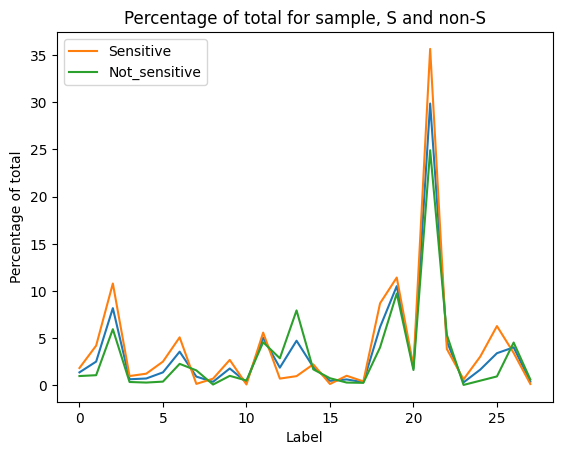

In [6]:
# Extract the data from the '%_S' column
labels = pd.to_numeric(result.index)
data = result['%_total']
data_S = result['%_S_total']
data_not_S = result['%_not_S_total']

# Create a bar plot
plt.plot(labels[:-1], data[:-1])
plt.plot(labels[:-1],data_S[:-1], label='Sensitive')
plt.plot(labels[:-1],data_not_S[:-1], label='Not_sensitive')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Percentage of total')
plt.title('Percentage of total for sample, S and non-S')
plt.legend()
# Show the plot
plt.show()

In [7]:
result_sorted = result.iloc[:-1].sort_values(by='diff_%_S_total', ascending=False)
result_sorted['original_label'] = result_sorted.index
result_sorted=result_sorted.reset_index(drop=True)
#result_sorted.reset_index(drop=True, inplace=True)
result_sorted

,total_count,%_total,|,S,%_S_total,diff_%_S_total,|,not_S,%_not_S_total,|,%_S_label,%_not_S_label,original_label
0,8285,29.86,|,4559,35.64,5.78,|,3726,24.91,|,55.0,45.0,21
1,948,3.42,|,805,6.29,2.87,|,143,0.96,|,85.0,15.0,25
2,2273,8.19,|,1382,10.80,2.61,|,891,5.96,|,61.0,39.0,2
3,1715,6.18,|,1113,8.70,2.52,|,602,4.03,|,65.0,35.0,18
4,703,2.53,|,540,4.22,1.69,|,163,1.09,|,77.0,23.0,1
5,994,3.58,|,652,5.10,1.52,|,342,2.29,|,66.0,34.0,6
6,467,1.68,|,391,3.06,1.38,|,76,0.51,|,84.0,16.0,24
7,386,1.39,|,324,2.53,1.14,|,62,0.41,|,84.0,16.0,5
8,2918,10.52,|,1462,11.43,0.91,|,1456,9.74,|,50.0,50.0,19
9,499,1.80,|,347,2.71,0.91,|,152,1.02,|,70.0,30.0,9


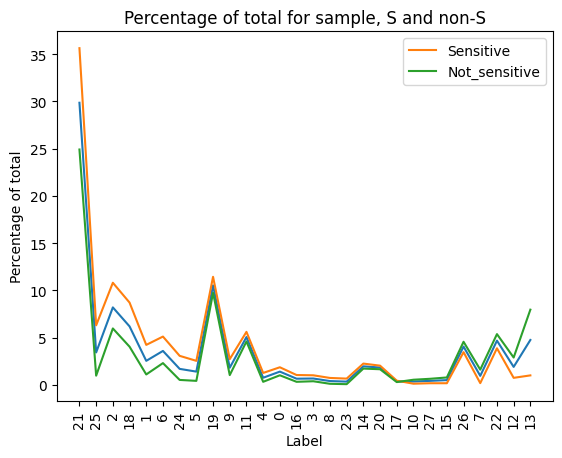

In [8]:
# Extract the data from the '%_S' column
labels_sorted = result_sorted['original_label']
#print(labels_sorted)
data = result_sorted['%_total']
data_S = result_sorted['%_S_total']
data_not_S = result_sorted['%_not_S_total']

# Create a bar plot
plt.plot(data)
plt.plot(data_S, label='Sensitive')
plt.plot(data_not_S, label='Not_sensitive')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Percentage of total')
#plt.xticks(labels_sorted)
plt.xticks(ticks=range(len(labels_sorted)), labels=labels_sorted, rotation=90)  # Rotate if there are many labels

plt.title('Percentage of total for sample, S and non-S')
plt.legend()
# Show the plot
plt.show()

**MODEL ORTHOGONAL DEBIASING**
---

12793 14956 0


,X_sensitive,Difference S/non S,X_debiaised,X_non_sensitive
0,-0.257521,0.146378,-0.403899,-0.403899
1,-0.134421,-0.247644,0.113223,0.113223
2,-0.554357,-0.068634,-0.485722,-0.485722
3,-0.586608,-0.153451,-0.433158,-0.433158
4,-0.051155,0.010707,-0.061861,-0.061861
...,...,...,...,...
763,0.119041,-0.142308,0.261349,0.261349
764,-0.230483,0.011593,-0.242076,-0.242076
765,0.176158,0.050037,0.126121,0.126121
766,0.273605,-0.188023,0.461628,0.461628


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        21532     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.24653D+04    |proj g|=  4.11537D+04


 This problem is unconstrained.



At iterate   50    f=  2.08017D+04    |proj g|=  8.31379D+02

At iterate  100    f=  1.66932D+04    |proj g|=  7.85830D+02

At iterate  150    f=  1.46755D+04    |proj g|=  2.06431D+02

At iterate  200    f=  1.36469D+04    |proj g|=  2.05513D+02

At iterate  250    f=  1.30241D+04    |proj g|=  1.05910D+02

At iterate  300    f=  1.27073D+04    |proj g|=  1.54810D+02

At iterate  350    f=  1.25281D+04    |proj g|=  1.81053D+02

At iterate  400    f=  1.24238D+04    |proj g|=  1.16570D+02

At iterate  450    f=  1.23662D+04    |proj g|=  3.06709D+01

At iterate  500    f=  1.23277D+04    |proj g|=  3.61356D+01

At iterate  550    f=  1.23087D+04    |proj g|=  1.82741D+01

At iterate  600    f=  1.22962D+04    |proj g|=  1.78591D+01

At iterate  650    f=  1.22887D+04    |proj g|=  1.24464D+01

At iterate  700    f=  1.22836D+04    |proj g|=  1.48859D+01

At iterate  750    f=  1.22808D+04    |proj g|=  6.31955D+00

At iterate  800    f=  1.22791D+04    |proj g|=  4.66916D+00

At iter

Accuracy on transformed test data: 0.8875274784676925
final score 0.9175793800199138
macro_fscore 0.8991022511781256
1-eval_scores['TPR_GAP'] 0.936056508861702


In [1]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import tokenizers as tk
from tqdm import tqdm

# Charger le tokenizer 
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Charger le modèle
model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

# Tokenize "man" and "woman"
tokens_man = tokenizer.encode("man", add_special_tokens=True)  # Ajoute les tokens spéciaux
tokens_woman = tokenizer.encode("woman", add_special_tokens=True)

print(tokens_man)
print(tokens_woman)

# transforme en tensor de batch (meme si un seul mot)

input_ids_man = tf.constant(tokens_man)[None, :]  # Ajoute une dimension de batch
input_ids_woman = tf.constant(tokens_woman)[None, :]  # Ajoute une dimension de batch

# Obtenir les embeddings
outputs_man = model(input_ids_man)
outputs_woman = model(input_ids_woman)

# Les embeddings du dernier layer pour le premier token ('[CLS]' par défaut)
embedding_man = outputs_man.last_hidden_state[0][0]
embedding_woman = outputs_woman.last_hidden_state[0][0]

print(embedding_man.shape)  # Doit être (768,)
print(embedding_woman.shape)  # Doit être (768,)


2024-03-13 00:34:08.282506: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-13 00:34:08.380148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 00:34:08.380203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 00:34:08.383753: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 00:34:08.402574: I tensorflow/core/platform/cpu_feature_guar

[101, 10817, 102]
[101, 18299, 102]


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

(768,)
(768,)


In [3]:
import torch


# Fonction de similarité cosinus
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Pré-générer les embeddings pour chaque token dans le vocabulaire
# ATTENTION : Cette étape est très coûteuse !
vocab_embeddings = {}
for word, token_id in tokenizer.vocab.items():
    input_ids = torch.tensor([tokenizer.convert_tokens_to_ids(word)]).unsqueeze(0)  # Ajouter batch dimension
    with torch.no_grad():
        outputs = model(input_ids)
    vocab_embeddings[word] = outputs.last_hidden_state[0, 0, :].numpy()  # Utiliser l'embedding du token

# Supposons que X soit votre matrice d'embeddings (n, 768)
# X = ...

# Trouver le mot le plus proche pour les 10 premiers embeddings
for i in range(10):
    embedding = X[i]
    similarities = {word: cosine_similarity(embedding, word_emb) for word, word_emb in vocab_embeddings.items()}
    closest_word = max(similarities, key=similarities.get)
    print(f"Ligne {i}: Mot le plus proche = {closest_word}")


ValueError: Exception encountered when calling layer 'tf_bert_model_1' (type TFBertModel).

Data of type <class 'torch.Tensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for input_ids.

Call arguments received by layer 'tf_bert_model_1' (type TFBertModel):
  • input_ids=tensor([[0]])
  • attention_mask=None
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

**baseline Logistic regression on raw data**
---

In [15]:
# Refresh training data
X_train, X_test, Y_train, Y_test, S_train, S_test = X_train_, X_test_, Y_train_, Y_test_, S_train_, S_test_

# training logistic model
clf_1 = LogisticRegression(random_state=0, max_iter=5000,verbose=1).fit(X_train, Y_train)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        21532     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47247D+04    |proj g|=  2.90786D+04


 This problem is unconstrained.



At iterate   50    f=  1.37026D+04    |proj g|=  3.14506D+02

At iterate  100    f=  1.06882D+04    |proj g|=  4.54697D+02

At iterate  150    f=  9.20768D+03    |proj g|=  1.99849D+02

At iterate  200    f=  8.45809D+03    |proj g|=  1.67687D+02

At iterate  250    f=  8.07370D+03    |proj g|=  9.41557D+01

At iterate  300    f=  7.88838D+03    |proj g|=  6.92864D+01

At iterate  350    f=  7.79214D+03    |proj g|=  7.69609D+01

At iterate  400    f=  7.74340D+03    |proj g|=  2.58579D+01

At iterate  450    f=  7.71825D+03    |proj g|=  2.19753D+01

At iterate  500    f=  7.70575D+03    |proj g|=  3.89296D+01

At iterate  550    f=  7.69910D+03    |proj g|=  1.91244D+01

At iterate  600    f=  7.69517D+03    |proj g|=  2.96541D+01

At iterate  650    f=  7.69305D+03    |proj g|=  5.35551D+00

At iterate  700    f=  7.69190D+03    |proj g|=  5.74991D+00

At iterate  750    f=  7.69123D+03    |proj g|=  2.85173D+00

At iterate  800    f=  7.69077D+03    |proj g|=  8.89784D+00

At iter

In [16]:
print("Coefficients:", clf_1.coef_.shape)
print("Intercept:", clf_1.intercept_.shape)

Coefficients: (28, 768)
Intercept: (28,)


In [30]:
# predicting and assessing
Y_pred_1 = clf_1.predict(X_test)
accuracy_1= accuracy_score(Y_test, Y_pred_1)  # Y_test are your original test labels
print(f"Accuracy on transformed test data: {accuracy_1}")
eval_scores_1, confusion_matrices_eval_1 = gap_eval_scores(Y_pred_1, Y_test, S_test, metrics=['TPR'])
final_score_1 = (eval_scores_1['macro_fscore']+ (1-eval_scores_1['TPR_GAP']))/2

#print results
print('final score',final_score_1)
print('macro_fscore',eval_scores_1['macro_fscore'])
print('1-eval_scores[\'TPR_GAP\']',1-eval_scores_1['TPR_GAP'])

Accuracy on transformed test data: 0.7638438438438439
final score 0.7365033273594812
macro_fscore 0.669337208333607
1-eval_scores['TPR_GAP'] 0.8036694463853555


In [22]:
print(eval_scores_1)
print(confusion_matrices_eval_1.keys)

#show confusion matrix for Accurarcy key 0
pd.DataFrame(confusion_matrices_eval_1[0])

{'accuracy': 0.7638438438438439, 'macro_fscore': 0.669337208333607, 'micro_fscore': 0.7638438438438439, 'TPR_GAP': 0.1963305536146444}
<built-in method keys of dict object at 0x7f0817dd8ac0>


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,48,1,9,0,0,0,1,0,0,0,...,1,0,0,6,1,0,2,1,6,0
1,1,93,5,0,0,0,0,0,0,1,...,1,1,0,21,1,0,23,0,0,0
2,3,2,355,0,1,0,2,0,0,1,...,1,2,1,16,2,0,3,0,3,0
3,0,0,0,20,0,0,3,0,0,0,...,0,12,0,1,1,0,0,3,0,0
4,2,0,3,0,31,1,0,0,0,2,...,2,1,2,1,0,0,0,0,2,0
5,0,0,0,0,0,68,0,0,1,3,...,0,0,2,5,0,1,1,0,1,0
6,0,0,1,0,0,0,156,0,0,1,...,0,12,1,1,0,0,0,3,2,0
7,0,0,0,0,0,0,0,6,0,0,...,0,2,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,22,0,...,5,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,2,0,0,0,77,...,3,0,1,2,2,0,0,0,4,0


In [23]:
# (Re)Load the "true" test data
X_test_true = dat['X_test']
S_test_true = dat['S_test'] 

# Classify the provided test data with you classifier
y_test_true_1 = clf_1.predict(X_test_true)
results_1=pd.DataFrame(y_test_true_1, columns= ['score'])

results_1.to_csv("Data_Challenge_MDI_341_1.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')

**SECOND METHOD - ADVERSARIAL NN**
---

In [24]:
# Refresh training data
# X_train, X_test, Y_train, Y_test, S_train, S_test = X_train_, X_test_, Y_train_, Y_test_, S_train_, S_test_

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy , CategoricalCrossentropy

from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical

# Assuming X_train is your input embeddings and S is your sensitive attribute

# Input layer
input_layer = Input(shape=(768,))

# Main task classifier layers
main_task_hidden = Dense(256, activation='relu')(input_layer)
main_task_output = Dropout(0.5)(main_task_hidden)
main_task_output = Dense(28, activation='softmax', name='main_task_output')(main_task_hidden)

# Adversarial component layers
adversary_hidden = Dense(256, activation='relu')(main_task_hidden)
adversary_hidden = Dropout(0.5)(adversary_hidden)
adversarial_output = Dense(1, activation='sigmoid', name='adversarial_output')(adversary_hidden)

# Model
model_2 = Model(inputs=input_layer, outputs=[main_task_output, adversarial_output])

# Optimizers
#main_task_optimizer = Adam(learning_rate=0.001)
#adversarial_optimizer = Adam(learning_rate=0.001)

# Loss functions
main_task_loss = CategoricalCrossentropy()
adversarial_loss = BinaryCrossentropy()

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss={'main_task_output': main_task_loss, 'adversarial_output': adversarial_loss},
              loss_weights=[1, -0.1],
              metrics={'main_task_output': ['accuracy'], 'adversarial_output': [AUC()]})

# Prepare the labels for the main task and the adversarial task
Y_main_task = to_categorical(Y_train, num_classes=28)#Y_train # Your main task labels
Y_adversary = S_train    # Your sensitive attribute labels

# check size on input .output
print(X_train.shape,Y_main_task.shape,Y_adversary.shape)

# X normal:isation
# none in method 2

# Train the model
model_2.fit(X_train, {'main_task_output': Y_main_task, 'adversarial_output': Y_adversary}, epochs=10)

# After training, you can use the output of `main_task_hidden` as your new unbiased representation


2024-03-13 09:11:16.614113: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-13 09:11:17.482658: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 09:11:17.482722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 09:11:17.610605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 09:11:17.884043: I tensorflow/core/platform/cpu_feature_guar

(22199, 768) (22199, 28) (22199,)
Epoch 1/10
694/694 [==============================] - 7s 8ms/step - loss: -326687.5938 - main_task_output_loss: 47.0292 - adversarial_output_loss: 3267346.2500 - main_task_output_accuracy: 0.1789 - adversarial_output_auc: 0.4979
Epoch 2/10
694/694 [==============================] - 5s 7ms/step - loss: -4937996.0000 - main_task_output_loss: 163.5791 - adversarial_output_loss: 49381588.0000 - main_task_output_accuracy: 0.0921 - adversarial_output_auc: 0.5000
Epoch 3/10
694/694 [==============================] - 6s 8ms/step - loss: -19514590.0000 - main_task_output_loss: 254.1033 - adversarial_output_loss: 195148528.0000 - main_task_output_accuracy: 0.0852 - adversarial_output_auc: 0.5000
Epoch 4/10
694/694 [==============================] - 5s 7ms/step - loss: -47027040.0000 - main_task_output_loss: 314.9364 - adversarial_output_loss: 470273376.0000 - main_task_output_accuracy: 0.0859 - adversarial_output_auc: 0.5000
Epoch 5/10
694/694 [=================

In [5]:
# Step 1: Transform X_train and X_test
feature_extractor_2 = Model(inputs=model_2.input, outputs=main_task_hidden)
X_train_transformed_2 = feature_extractor_2.predict(X_train)
X_test_transformed_2 = feature_extractor_2.predict(X_test)
X_test_true_transformed_2 = feature_extractor_2.predict(X_test_true)

# Step 2: Train a new classifier on the transformed training data
clf_2 = LogisticRegression(max_iter=5000)  # Increase max_iter if needed for convergence
history_new_2 = clf_2.fit(X_train_transformed_2, Y_train)  # Y_train are your original training labels

# Step 3: Predict on the transformed test data and evaluate
Y_pred_2 = clf_2.predict(X_test_transformed_2)
accuracy_2= accuracy_score(Y_test, Y_pred_2)  # Y_test are your original test labels
print(f"Accuracy on transformed test data: {accuracy_2}")

# Step 4 : Predict with gloabl score
eval_scores_2, confusion_matrices_eval_2 = gap_eval_scores(Y_pred_2, Y_test, S_test, metrics=['TPR'])
final_score_2 = (eval_scores_2['macro_fscore']+ (1-eval_scores_2['TPR_GAP']))/2
print('\nfinal',final_score_2)
print('macro_fscore',eval_scores_2['macro_fscore'])
print('1-eval_scores',1-eval_scores_2['TPR_GAP'])

372/372 [==============================] - 1s 1ms/step
Accuracy on transformed test data: 0.5430630630630631

final 0.4596234141184474
macro_fscore 0.27585175953831925
1-eval_scores 0.6433950686985757


In [6]:
# Classify the provided test data with you classifier
y_test = clf_2.predict(X_test_true_transformed_2)
results=pd.DataFrame(y_test, columns= ['score'])

results.to_csv("Data_Challenge_MDI_341_2.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')

**THIRD METHOD**
---

In [7]:
from sklearn.preprocessing import StandardScaler

# get X_train an
# X_train, X_test, Y_train, Y_test, S_train, S_test = train_test_split(X, Y, S, test_size=0.3, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(X_train)

# Transform your training data
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_test_true_standardized = scaler.transform(X_test_true)



In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy , CategoricalCrossentropy

from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical

# Assuming X_train is your input embeddings and S is your sensitive attribute

# Input layer
input_layer = Input(shape=(768,))

# Main task classifier layers
main_task_hidden = Dense(256, activation='relu')(input_layer)
main_task_hidden = Dropout(0.5)(main_task_hidden)
main_task_output = Dense(28, activation='softmax', name='main_task_output')(main_task_hidden)

# Adversarial component layers
adversary_hidden = Dense(256, activation='relu')(main_task_hidden)
adversary_hidden = Dropout(0.5)(adversary_hidden)
adversarial_output = Dense(1, activation='sigmoid', name='adversarial_output')(adversary_hidden)

# Model
model_3 = Model(inputs=input_layer, outputs=[main_task_output, adversarial_output])

# Optimizers
#main_task_optimizer = Adam(learning_rate=0.001)
#adversarial_optimizer = Adam(learning_rate=0.001)

# Loss functions
main_task_loss = CategoricalCrossentropy()
adversarial_loss = BinaryCrossentropy()

# Compile the model
model_3.compile(optimizer=Adam(learning_rate=0.001),
              loss={'main_task_output': main_task_loss, 'adversarial_output': adversarial_loss},
              metrics={'main_task_output': ['accuracy'], 'adversarial_output': [AUC()]})

# Prepare the labels for the main task and the adversarial task
Y_main_task = to_categorical(Y_train, num_classes=28)#Y_train # Your main task labels
Y_adversary = S_train    # Your sensitive attribute labels

# check size on input .output
print(X_train_standardized.shape,Y_main_task.shape,Y_adversary.shape)

# Train the model
model_3.fit(X_train_standardized, {'main_task_output': Y_main_task, 'adversarial_output': Y_adversary}, epochs=10)

# After training, you can use the output of `main_task_hidden` as your new unbiased representation


(22199, 768) (22199, 28) (22199,)
Epoch 1/10
694/694 [==============================] - 7s 9ms/step - loss: 1.4833 - main_task_output_loss: 1.4645 - adversarial_output_loss: 0.0188 - main_task_output_accuracy: 0.6046 - adversarial_output_auc_1: 0.8353
Epoch 2/10
694/694 [==============================] - 6s 8ms/step - loss: 1.0295 - main_task_output_loss: 1.0208 - adversarial_output_loss: 0.0087 - main_task_output_accuracy: 0.7000 - adversarial_output_auc_1: 0.9661
Epoch 3/10
694/694 [==============================] - 5s 8ms/step - loss: 0.9186 - main_task_output_loss: 0.9108 - adversarial_output_loss: 0.0077 - main_task_output_accuracy: 0.7275 - adversarial_output_auc_1: 0.9913
Epoch 4/10
694/694 [==============================] - 5s 7ms/step - loss: 0.8486 - main_task_output_loss: 0.8427 - adversarial_output_loss: 0.0059 - main_task_output_accuracy: 0.7425 - adversarial_output_auc_1: 0.9921
Epoch 5/10
694/694 [==============================] - 5s 7ms/step - loss: 0.8023 - main_task_o

In [9]:
# Step 1: Transform X_train and X_test
feature_extractor_3 = Model(inputs=model_3.input, outputs=main_task_hidden)
X_train_transformed_3 = feature_extractor_3.predict(X_train_standardized)
X_test_transformed_3 = feature_extractor_3.predict(X_test_standardized)
X_test_true_transformed_3 = feature_extractor_3.predict(X_test_true_standardized)

# Step 2: Train a new classifier on the transformed training data
new_classifier_3 = LogisticRegression(max_iter=10000)  # Increase max_iter if needed for convergence
history_new_3 = new_classifier_3.fit(X_train_transformed_3, Y_train)  # Y_train are your original training labels

# Step 3: Predict on the transformed test data and evaluate
Y_pred_3 = new_classifier_3.predict(X_test_transformed_3)
accuracy_3= accuracy_score(Y_test, Y_pred_3)  # Y_test are your original test labels
print(f"Accuracy on transformed test data: {accuracy_3}")

372/372 [==============================] - 0s 1ms/step
Accuracy on transformed test data: 0.7243243243243244


In [10]:
# calculate final score
eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred_3, Y_test, S_test, metrics=['TPR'])
final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2

print('macro_fscore',eval_scores['macro_fscore'])
print('1-eval_scores',1-eval_scores['TPR_GAP'])
print('final score (average)',final_score)

macro_fscore 0.6526762106986365
1-eval_scores 0.805447366589469
final score (average) 0.7290617886440527


In [11]:
# Load the "true" test data
X_test_true = dat['X_test']
S_test_true = dat['S_test'] 

X_test_true_transformed_3 = feature_extractor_3.predict(X_test_true)

# Classify the provided test data with you classifier
y_test_true = clf.predict(X_test_true_transformed_3)
results_3=pd.DataFrame(y_test_true, columns= ['score'])

results_3.to_csv("Data_Challenge_MDI_341_3.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')

372/372 [==============================] - 1s 2ms/step


NameError: name 'clf' is not defined

**4th METHOD**
---

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy , CategoricalCrossentropy

from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical

# Assuming X_train is your input embeddings and S is your sensitive attribute

# Input layer
input_layer = Input(shape=(768,))

# Main task classifier layers
main_task_hidden = Dense(512, activation='relu')(input_layer)
main_task_hidden = Dropout(0.5)(main_task_hidden)
main_task_output = Dense(28, activation='softmax', name='main_task_output')(main_task_hidden)

# Adversarial component layers
adversary_hidden = Dense(512, activation='relu')(main_task_hidden)
adversary_hidden = Dropout(0.5)(adversary_hidden)
adversarial_output = Dense(1, activation='sigmoid', name='adversarial_output')(adversary_hidden)

# Model
model_4 = Model(inputs=input_layer, outputs=[main_task_output, adversarial_output])

# Optimizers
#main_task_optimizer = Adam(learning_rate=0.001)
#adversarial_optimizer = Adam(learning_rate=0.001)

# Loss functions
main_task_loss = CategoricalCrossentropy()
adversarial_loss = BinaryCrossentropy()

# Compile the model
model_4.compile(optimizer=Adam(learning_rate=0.001),
              loss={'main_task_output': main_task_loss, 'adversarial_output': adversarial_loss},
              metrics={'main_task_output': ['accuracy'], 'adversarial_output': [AUC()]})

# Prepare the labels for the main task and the adversarial task
Y_main_task = to_categorical(Y_train, num_classes=28)#Y_train # Your main task labels
Y_adversary = S_train    # Your sensitive attribute labels

# check size on input .output
print(X_train_standardized.shape,Y_main_task.shape,Y_adversary.shape)

# Train the model
model_4.fit(X_train_standardized, {'main_task_output': Y_main_task, 'adversarial_output': Y_adversary}, epochs=10)

# After training, you can use the output of `main_task_hidden` as your new unbiased representation


In [ ]:
# Step 1: Transform X_train and X_test
feature_extractor_4 = Model(inputs=model_4.input, outputs=main_task_hidden)
X_train_transformed_4 = feature_extractor_4.predict(X_train_standardized)
X_test_transformed_4 = feature_extractor_4.predict(X_test_standardized)
X_test_true_transformed_4 = feature_extractor_4.predict(X_test_true_standardized)

# Step 2: Train a new classifier on the transformed training data
new_classifier_4 = LogisticRegression(max_iter=10000)  # Increase max_iter if needed for convergence
history_4 = new_classifier_4.fit(X_train_transformed_4, Y_train)  # Y_train are your original training labels

# Step 3: Predict on the transformed test data and evaluate
Y_pred_4 = new_classifier_4.predict(X_test_transformed_4)
accuracy_4 = accuracy_score(Y_test, Y_pred_4)  # Y_test are your original test labels
print(f"Accuracy on transformed test data: {accuracy_4}")

In [ ]:
eval_scores, confusion_matrices_eval = gap_eval_scores(Y_pred_4, Y_test, S_test, metrics=['TPR'])
#eval_scores#eval_scores['macro_fscore']
#eval_scores['TPR_GAP']
final_score = (eval_scores['macro_fscore']+ (1-eval_scores['TPR_GAP']))/2
print(final_score)

In [ ]:
# Load the "true" test data
X_test_true = dat['X_test']
S_test_true = dat['S_test'] 

X_test_true_transformed_4 = feature_extractor_4.predict(X_test_true)

# Classify the provided test data with you classifier
y_test_true = clf.predict(X_test_true_transformed_4)
results_4=pd.DataFrame(y_test_true, columns= ['score'])

results_4.to_csv("Data_Challenge_MDI_341_4.csv", header = None, index = None)
# np.savetxt('y_test_challenge_student.txt', y_test, delimiter=',')